Deep Learning
=============

Assignment 1
------------

The objective of this assignment is to learn about simple data curation practices, and familiarize you with some of the data we'll be reusing later.

This notebook uses the [notMNIST](http://yaroslavvb.blogspot.com/2011/09/notmnist-dataset.html) dataset to be used with python experiments. This dataset is designed to look like the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset, while looking a little more like real data: it's a harder task, and the data is a lot less 'clean' than MNIST.

In [2]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import tarfile
from hashlib import sha1
from IPython.display import display, Image
from scipy import ndimage
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle
from sklearn import metrics

First, we'll download the dataset to our local machine. The data consists of characters rendered in a variety of fonts on a 28x28 image. The labels are limited to 'A' through 'J' (10 classes). The training set has about 500k and the testset 19000 labelled examples. Given these sizes, it should be possible to train models quickly on any machine.

In [3]:
url = 'http://yaroslavvb.com/upload/notMNIST/'

def maybe_download(filename, expected_bytes):
  """Download a file if not present, and make sure it's the right size."""
  if not os.path.exists(filename):
    filename, _ = urlretrieve(url + filename, filename)
  statinfo = os.stat(filename)
  if statinfo.st_size == expected_bytes:
    print ('Found and verified ', filename)
  else:
    raise Exception(
      'Failed to verify' + filename + '. Can you get to it with a browser?')
  return filename

train_filename = maybe_download('notMNIST_large.tar.gz', 247336696)
test_filename = maybe_download('notMNIST_small.tar.gz', 8458043)

Found and verified  notMNIST_large.tar.gz
Found and verified  notMNIST_small.tar.gz


Extract the dataset from the compressed .tar.gz file.
This should give you a set of directories, labelled A through J.

In [4]:
num_classes = 10

def extract(filename):
  tar = tarfile.open(filename)
  root = os.path.splitext(os.path.splitext(filename)[0])[0]  # remove .tar.gz
  print('Extracting data for %s. This may take a while. Please wait.' % root)
  sys.stdout.flush()
  tar.extractall()
  tar.close()
  data_folders = [
    os.path.join(root, d) for d in sorted(os.listdir(root)) if d != '.DS_Store']
  if len(data_folders) != num_classes:
    raise Exception(
      'Expected %d folders, one per class. Found %d instead.' % (
        num_classes, len(data_folders)))
  print(data_folders)
  return data_folders
  
train_folders = extract(train_filename)
test_folders = extract(test_filename)

Extracting data for notMNIST_large. This may take a while. Please wait.
['notMNIST_large/A', 'notMNIST_large/B', 'notMNIST_large/C', 'notMNIST_large/D', 'notMNIST_large/E', 'notMNIST_large/F', 'notMNIST_large/G', 'notMNIST_large/H', 'notMNIST_large/I', 'notMNIST_large/J']
Extracting data for notMNIST_small. This may take a while. Please wait.
['notMNIST_small/A', 'notMNIST_small/B', 'notMNIST_small/C', 'notMNIST_small/D', 'notMNIST_small/E', 'notMNIST_small/F', 'notMNIST_small/G', 'notMNIST_small/H', 'notMNIST_small/I', 'notMNIST_small/J']


---
Problem 1
---------

Let's take a peek at some of the data to make sure it looks sensible. Each exemplar should be an image of a character A through J rendered in a different font. Display a sample of the images that we just downloaded. Hint: you can use the package IPython.display.

---

## Solution

In [5]:
def display_sample_images(data_folders):
  for folder in data_folders:
    # Display sample image
    sample_file = [os.path.join(folder, f) for f in os.listdir(data_folders[0])][0]
    print ('sample folder ', folder)
    print ('sample image to display ', sample_file)
    display(Image(filename=sample_file))

display_sample_images(train_folders)
display_sample_images(test_folders)

sample folder  notMNIST_large/A
sample image to display  notMNIST_large/A/a29ydW5pc2hpLnR0Zg==.png


sample folder  notMNIST_large/B
sample image to display  notMNIST_large/B/a29ydW5pc2hpLnR0Zg==.png


sample folder  notMNIST_large/C
sample image to display  notMNIST_large/C/a29ydW5pc2hpLnR0Zg==.png


sample folder  notMNIST_large/D
sample image to display  notMNIST_large/D/a29ydW5pc2hpLnR0Zg==.png


sample folder  notMNIST_large/E
sample image to display  notMNIST_large/E/a29ydW5pc2hpLnR0Zg==.png


sample folder  notMNIST_large/F
sample image to display  notMNIST_large/F/a29ydW5pc2hpLnR0Zg==.png


sample folder  notMNIST_large/G
sample image to display  notMNIST_large/G/a29ydW5pc2hpLnR0Zg==.png


sample folder  notMNIST_large/H
sample image to display  notMNIST_large/H/a29ydW5pc2hpLnR0Zg==.png


sample folder  notMNIST_large/I
sample image to display  notMNIST_large/I/a29ydW5pc2hpLnR0Zg==.png


sample folder  notMNIST_large/J
sample image to display  notMNIST_large/J/a29ydW5pc2hpLnR0Zg==.png


sample folder  notMNIST_small/A
sample image to display  notMNIST_small/A/MDEtMDEtMDAudHRm.png


sample folder  notMNIST_small/B
sample image to display  notMNIST_small/B/MDEtMDEtMDAudHRm.png


sample folder  notMNIST_small/C
sample image to display  notMNIST_small/C/MDEtMDEtMDAudHRm.png


sample folder  notMNIST_small/D
sample image to display  notMNIST_small/D/MDEtMDEtMDAudHRm.png


sample folder  notMNIST_small/E
sample image to display  notMNIST_small/E/MDEtMDEtMDAudHRm.png


sample folder  notMNIST_small/F
sample image to display  notMNIST_small/F/MDEtMDEtMDAudHRm.png


sample folder  notMNIST_small/G
sample image to display  notMNIST_small/G/MDEtMDEtMDAudHRm.png


sample folder  notMNIST_small/H
sample image to display  notMNIST_small/H/MDEtMDEtMDAudHRm.png


sample folder  notMNIST_small/I
sample image to display  notMNIST_small/I/MDEtMDEtMDAudHRm.png


sample folder  notMNIST_small/J
sample image to display  notMNIST_small/J/MDEtMDEtMDAudHRm.png


Now let's load the data in a more manageable format.

We'll convert the entire dataset into a 3D array (image index, x, y) of floating point values, normalized to have approximately zero mean and standard deviation ~0.5 to make training easier down the road. The labels will be stored into a separate array of integers 0 through 9.

A few images might not be readable, we'll just skip them.

In [6]:
image_size = 28  # Pixel width and height.
pixel_depth = 255.0  # Number of levels per pixel.

def load(data_folders, min_num_images, max_num_images):
  dataset = np.ndarray(
    shape=(max_num_images, image_size, image_size), dtype=np.float32)
  labels = np.ndarray(shape=(max_num_images), dtype=np.int32)
  label_index = 0
  image_index = 0
  for folder in data_folders:
    # Display sample image
    sample_file = [os.path.join(folder, f) for f in os.listdir(data_folders[0])][0]
    print ('sample folder ', folder)
    print ('sample image to display ', sample_file)
    display(Image(filename=sample_file))
   
    for image in os.listdir(folder):
      if image_index >= max_num_images:
        raise Exception('More images than expected: %d >= %d' % (
          image_index, max_num_images))
      image_file = os.path.join(folder, image)
      try:
        image_data = (ndimage.imread(image_file).astype(float) -
                      pixel_depth / 2) / pixel_depth
        if image_data.shape != (image_size, image_size):
          raise Exception('Unexpected image shape: %s' % str(image_data.shape))
        dataset[image_index, :, :] = image_data
        labels[image_index] = label_index
        image_index += 1
      except IOError as e:
        print('Could not read:', image_file, ':', e, '- it\'s ok, skipping.')
    label_index += 1
  num_images = image_index
  dataset = dataset[0:num_images, :, :]
  labels = labels[0:num_images]
  if num_images < min_num_images:
    raise Exception('Many fewer images than expected: %d < %d' % (
        num_images, min_num_images))
  print('Full dataset tensor:', dataset.shape)
  print('Mean:', np.mean(dataset))
  print('Standard deviation:', np.std(dataset))
  print('Labels:', labels.shape)
  return dataset, labels
train_dataset, train_labels = load(train_folders, 450000, 550000)
test_dataset, test_labels = load(test_folders, 18000, 20000)

sample folder  notMNIST_large/A
sample image to display  notMNIST_large/A/a29ydW5pc2hpLnR0Zg==.png


Could not read: notMNIST_large/A/RnJlaWdodERpc3BCb29rSXRhbGljLnR0Zg==.png : cannot identify image file 'notMNIST_large/A/RnJlaWdodERpc3BCb29rSXRhbGljLnR0Zg==.png' - it's ok, skipping.
Could not read: notMNIST_large/A/SG90IE11c3RhcmQgQlROIFBvc3Rlci50dGY=.png : cannot identify image file 'notMNIST_large/A/SG90IE11c3RhcmQgQlROIFBvc3Rlci50dGY=.png' - it's ok, skipping.
Could not read: notMNIST_large/A/Um9tYW5hIEJvbGQucGZi.png : cannot identify image file 'notMNIST_large/A/Um9tYW5hIEJvbGQucGZi.png' - it's ok, skipping.
sample folder  notMNIST_large/B
sample image to display  notMNIST_large/B/a29ydW5pc2hpLnR0Zg==.png


Could not read: notMNIST_large/B/TmlraXNFRi1TZW1pQm9sZEl0YWxpYy5vdGY=.png : cannot identify image file 'notMNIST_large/B/TmlraXNFRi1TZW1pQm9sZEl0YWxpYy5vdGY=.png' - it's ok, skipping.
sample folder  notMNIST_large/C
sample image to display  notMNIST_large/C/a29ydW5pc2hpLnR0Zg==.png


sample folder  notMNIST_large/D
sample image to display  notMNIST_large/D/a29ydW5pc2hpLnR0Zg==.png


Could not read: notMNIST_large/D/VHJhbnNpdCBCb2xkLnR0Zg==.png : cannot identify image file 'notMNIST_large/D/VHJhbnNpdCBCb2xkLnR0Zg==.png' - it's ok, skipping.
sample folder  notMNIST_large/E
sample image to display  notMNIST_large/E/a29ydW5pc2hpLnR0Zg==.png


sample folder  notMNIST_large/F
sample image to display  notMNIST_large/F/a29ydW5pc2hpLnR0Zg==.png


sample folder  notMNIST_large/G
sample image to display  notMNIST_large/G/a29ydW5pc2hpLnR0Zg==.png


sample folder  notMNIST_large/H
sample image to display  notMNIST_large/H/a29ydW5pc2hpLnR0Zg==.png


sample folder  notMNIST_large/I
sample image to display  notMNIST_large/I/a29ydW5pc2hpLnR0Zg==.png


sample folder  notMNIST_large/J
sample image to display  notMNIST_large/J/a29ydW5pc2hpLnR0Zg==.png


Full dataset tensor: (529114, 28, 28)
Mean: -0.0816596
Standard deviation: 0.454233
Labels: (529114,)
sample folder  notMNIST_small/A
sample image to display  notMNIST_small/A/MDEtMDEtMDAudHRm.png


Could not read: notMNIST_small/A/RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png : cannot identify image file 'notMNIST_small/A/RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png' - it's ok, skipping.
sample folder  notMNIST_small/B
sample image to display  notMNIST_small/B/MDEtMDEtMDAudHRm.png


sample folder  notMNIST_small/C
sample image to display  notMNIST_small/C/MDEtMDEtMDAudHRm.png


sample folder  notMNIST_small/D
sample image to display  notMNIST_small/D/MDEtMDEtMDAudHRm.png


sample folder  notMNIST_small/E
sample image to display  notMNIST_small/E/MDEtMDEtMDAudHRm.png


sample folder  notMNIST_small/F
sample image to display  notMNIST_small/F/MDEtMDEtMDAudHRm.png


Could not read: notMNIST_small/F/Q3Jvc3NvdmVyIEJvbGRPYmxpcXVlLnR0Zg==.png : cannot identify image file 'notMNIST_small/F/Q3Jvc3NvdmVyIEJvbGRPYmxpcXVlLnR0Zg==.png' - it's ok, skipping.
sample folder  notMNIST_small/G
sample image to display  notMNIST_small/G/MDEtMDEtMDAudHRm.png


sample folder  notMNIST_small/H
sample image to display  notMNIST_small/H/MDEtMDEtMDAudHRm.png


sample folder  notMNIST_small/I
sample image to display  notMNIST_small/I/MDEtMDEtMDAudHRm.png


sample folder  notMNIST_small/J
sample image to display  notMNIST_small/J/MDEtMDEtMDAudHRm.png


Full dataset tensor: (18724, 28, 28)
Mean: -0.0746362
Standard deviation: 0.458622
Labels: (18724,)


---
Problem 2
---------

Let's verify that the data still looks good. Displaying a sample of the labels and images from the ndarray. Hint: you can use matplotlib.pyplot.

---

## Solution

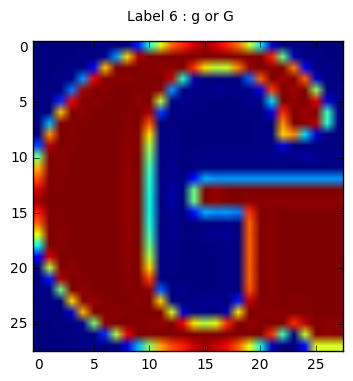

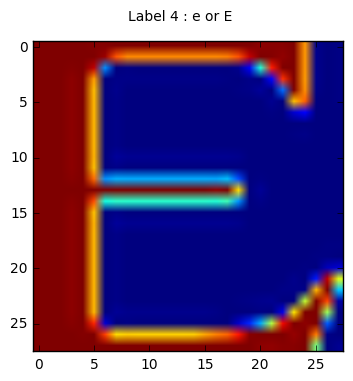

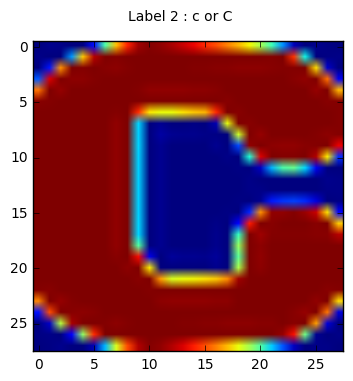

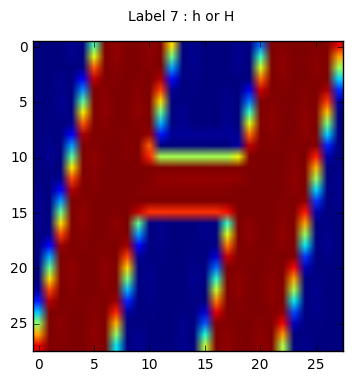

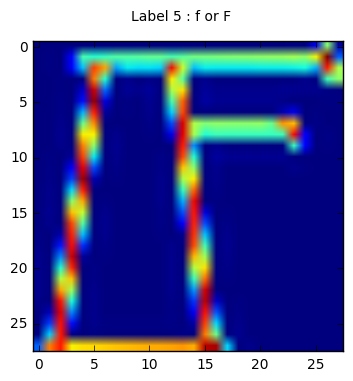

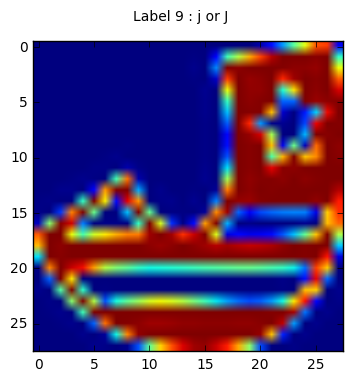

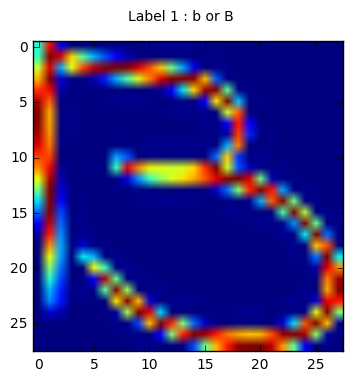

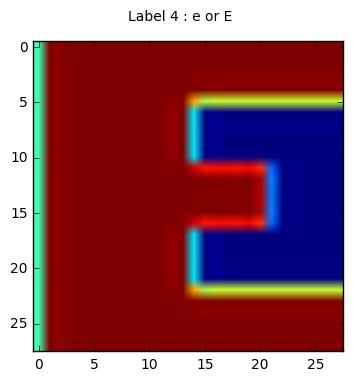

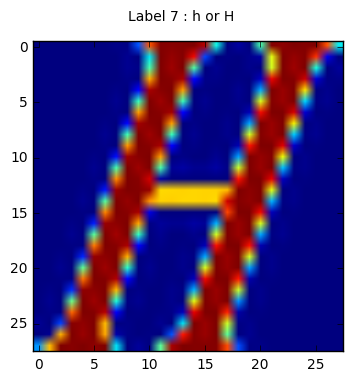

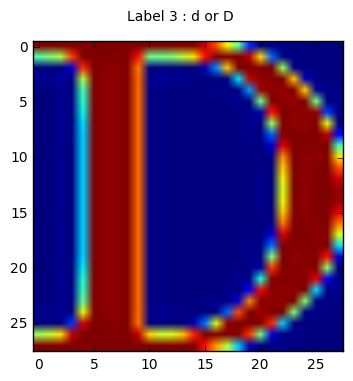

In [8]:
def display_sample_images_from_dataset(dataset, labels, sample_size):
  image_samples = np.random.randint(dataset.shape[0],size=sample_size)
  for image_index in image_samples:
    plt.figure()
    plt.suptitle('Label ' + 
                 str(labels[image_index]) + ' : ' + 
                 chr(ord('a') + labels[image_index]) +  ' or ' + 
                 chr(ord('A') + labels[image_index]))
    plt.imshow(dataset[image_index])
    plt.show()

plt.close('all')
display_sample_images_from_dataset(train_dataset, train_labels, 5)

display_sample_images_from_dataset(test_dataset, test_labels, 5)

Next, we'll randomize the data. It's important to have the labels well shuffled for the training and test distributions to match.

In [9]:
np.random.seed(133)
def randomize(dataset, labels):
  permutation = np.random.permutation(labels.shape[0])
  shuffled_dataset = dataset[permutation,:,:]
  shuffled_labels = labels[permutation]
  return shuffled_dataset, shuffled_labels
train_dataset, train_labels = randomize(train_dataset, train_labels)
test_dataset, test_labels = randomize(test_dataset, test_labels)

---
Problem 3
---------
Convince yourself that the data is still good after shuffling!

---

## Solution

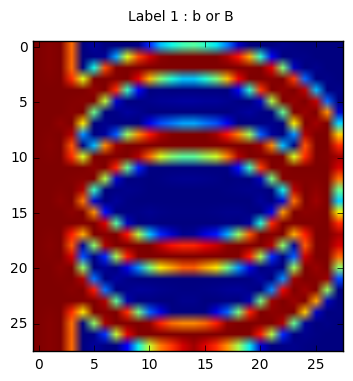

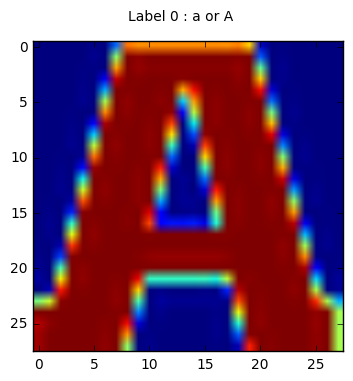

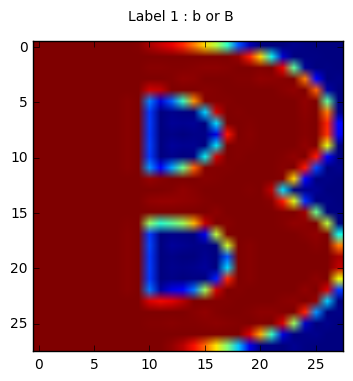

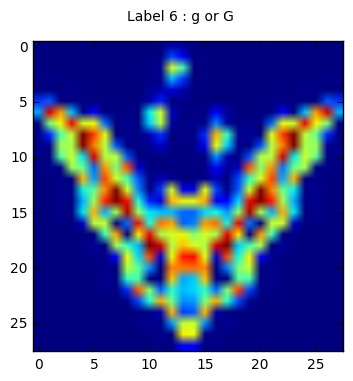

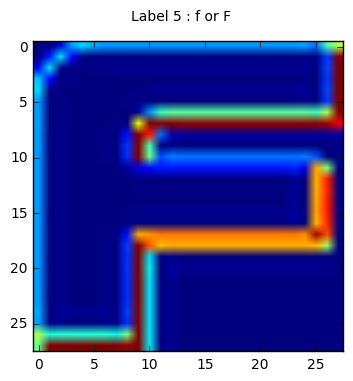

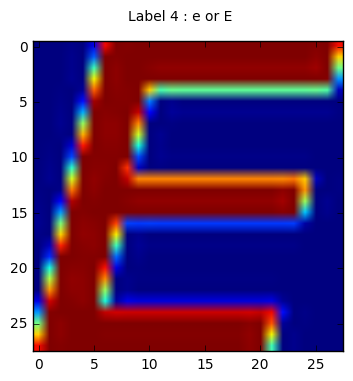

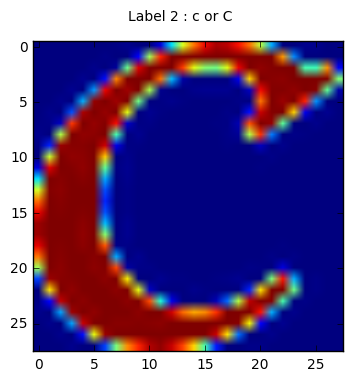

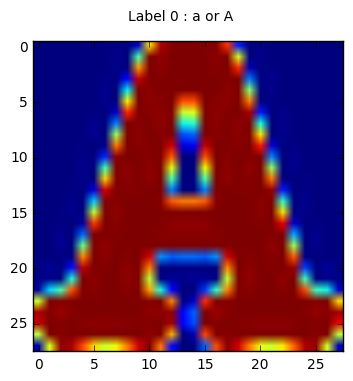

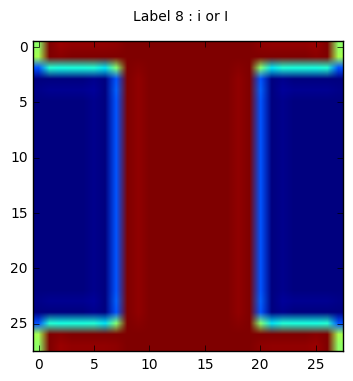

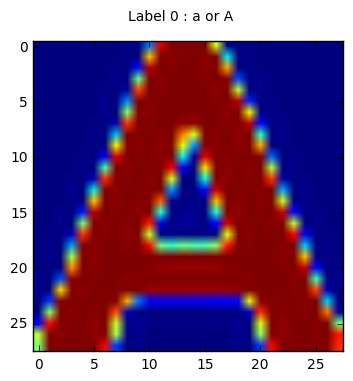

In [10]:
plt.close('all')
display_sample_images_from_dataset(train_dataset, train_labels, 5)

display_sample_images_from_dataset(test_dataset, test_labels, 5)

---
Problem 4
---------
Another check: we expect the data to be balanced across classes. Verify that.

---

## Solution

In [12]:
def get_class_distribution(dataset, labels):
  class_instances_count = np.zeros(num_classes)
  for image_index in range(0, dataset.shape[0] - 1):
    class_instances_count[labels[image_index]] += 1;
    
  return class_instances_count * 100 / class_instances_count.sum()
    
print ('Percentage of number of instances for each class label of total', num_classes, 'classes in test data set') 
class_distribution = get_class_distribution(train_dataset, train_labels)
print (class_distribution)
print ('sd =', class_distribution.std())

Percentage of number of instances for each class label of total 10 classes in test data set
[  9.99956531   9.9999433   10.0001323    9.9999433   10.0001323
  10.0001323    9.9999433   10.0001323   10.0001323    9.9999433 ]
sd = 0.000170095990838


### 10 class labels have almost 10% instances each, so data is balanced

Prune the training data as needed. Depending on your computer setup, you might not be able to fit it all in memory, and you can tune train_size as needed.

Also create a validation dataset for hyperparameter tuning.

In [13]:
train_size = 200000
valid_size = 10000

valid_dataset = train_dataset[:valid_size,:,:]
valid_labels = train_labels[:valid_size]
train_dataset = train_dataset[valid_size:valid_size+train_size,:,:]
train_labels = train_labels[valid_size:valid_size+train_size]
print('Training', train_dataset.shape, train_labels.shape)
print('Validation', valid_dataset.shape, valid_labels.shape)

Training (200000, 28, 28) (200000,)
Validation (10000, 28, 28) (10000,)


Finally, let's save the data for later reuse:

In [14]:
pickle_file = 'notMNIST.pickle'

try:
  f = open(pickle_file, 'wb')
  save = {
    'train_dataset': train_dataset,
    'train_labels': train_labels,
    'valid_dataset': valid_dataset,
    'valid_labels': valid_labels,
    'test_dataset': test_dataset,
    'test_labels': test_labels,
    }
  pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print('Unable to save data to', pickle_file, ':', e)
  raise

In [15]:
statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size)

Compressed pickle size: 718193872


---
Problem 5
---------

By construction, this dataset might contain a lot of overlapping samples, including training data that's also contained in the validation and test set! Overlap between training and test can skew the results if you expect to use your model in an environment where there is never an overlap, but are actually ok if you expect to see training samples recur when you use it.
Measure how much overlap there is between training, validation and test samples.

Optional questions:
- What about near duplicates between datasets? (images that are almost identical)
- Create a sanitized validation and test set, and compare your accuracy on those in subsequent assignments.
---

## Solution

In [18]:

def get_count_exact_overlaps(dataset1, dataset2):
  dataset1_hash = [
                   sha1(dataset1_instance).digest() 
                   for dataset1_instance in dataset1
                  ]
  dataset2_hash = [
                   sha1(dataset2_instance).digest() 
                   for dataset2_instance in dataset2
                  ]
  return np.intersect1d(dataset1_hash, dataset2_hash).size
    
print('Count of exact overlaping instances between valid and train dataset : ' + str(get_count_exact_overlaps(valid_dataset, train_dataset)))
print('Count of exact overlaping instances between test and train dataset : ' + str(get_count_exact_overlaps(test_dataset, train_dataset)))

Count of exact overlaping instances between valid and train dataset : 900
Count of exact overlaping instances between test and train dataset : 2059


In [19]:
# Get hash on similarity rather than strict matching
# i.e, find near duplicates instead of strict duplicates
def get_custom_hash(instance):
  difference = []
  for row in range(0, 28):
    for col in range(0, 27):
      difference.append(instance[col][row]  > instance[col + 1][row])
  return sha1(np.array(difference).astype(int))

def get_count_overlaps(dataset1, dataset2):
  dataset1_hash = [
                   get_custom_hash(dataset1_instance).digest() 
                   for dataset1_instance in dataset1
                  ]
  dataset2_hash = [
                   get_custom_hash(dataset2_instance).digest() 
                   for dataset2_instance in dataset2
                  ]
  return np.intersect1d(dataset1_hash, dataset2_hash).size
    
print ('Count of overlaping instances between valid and train dataset : ' + str(get_count_overlaps(valid_dataset, train_dataset)))
print ('Count of overlaping instances between test and train dataset : ' + str(get_count_overlaps(test_dataset, train_dataset)))

Count of overlaping instances between valid and train dataset : 983
Count of overlaping instances between test and train dataset : 2229


In [20]:
def get_dataset_hash(dataset):
  return [
          sha1(dataset_instance).digest() 
          for dataset_instance in dataset
         ]

train_dataset_hash = get_dataset_hash(train_dataset)
valid_dataset_hash = get_dataset_hash(valid_dataset)
test_dataset_hash = get_dataset_hash(test_dataset)

duplicates_in_train_and_valid_dataset = np.intersect1d(train_dataset_hash, valid_dataset_hash)
duplicates_in_train_and_test_dataset = np.intersect1d(train_dataset_hash, test_dataset_hash)
duplicates_in_valid_and_test_dataset = np.intersect1d(test_dataset_hash, valid_dataset_hash)

duplicates = np.hstack(
                       (duplicates_in_train_and_valid_dataset,
                        duplicates_in_train_and_test_dataset,
                        duplicates_in_valid_and_test_dataset)
                      )

def get_sanitize(dataset, dataset_hash, exclude_hash):
  return np.array([
                   dataset[index] for index in 
                   np.arange(dataset.shape[0]) if
                   dataset_hash[index] not in 
                   exclude_hash
                 ])

sanitized_valid_dataset = get_sanitize(valid_dataset, valid_dataset_hash, duplicates)
sanitized_test_dataset = get_sanitize(test_dataset, test_dataset_hash, duplicates)

print ('original valid dataset shape',  valid_dataset.shape)
print ('sanitized valid dataset shape', sanitized_valid_dataset.shape)
print ('original test dataset shape',  test_dataset.shape)
print ('sanitized test dataset shape', sanitized_test_dataset.shape)

original valid dataset shape (10000, 28, 28)
sanitized valid dataset shape (8865, 28, 28)
original test dataset shape (18724, 28, 28)
sanitized test dataset shape (16237, 28, 28)


---
Problem 6
---------

Let's get an idea of what an off-the-shelf classifier can give you on this data. It's always good to check that there is something to learn, and that it's a problem that is not so trivial that a canned solution solves it.

Train a simple model on this data using 50, 100, 1000 and 5000 training samples. Hint: you can use the LogisticRegression model from sklearn.linear_model.

Optional question: train an off-the-shelf model on all the data!

---

## Solution

In [21]:

def get_classifier(dataset, labels, sample_size):
  train_n_dataset = dataset[:sample_size, :, :]
  train_n_labels = labels[:sample_size]
  # convert to 2d
  train_n_dataset = train_n_dataset.reshape(sample_size, image_size * image_size)
  model = LogisticRegression()
  model.fit(train_n_dataset, train_n_labels)
  
  return model

def run_test(classifier, test_name):
 print ('Test result of classifier, ', test_name)
 test_dataset2d = test_dataset.reshape(test_dataset.shape[0], image_size * image_size)
 predicted = classifier.predict(test_dataset2d)
 print(metrics.classification_report(test_labels, predicted))
 print ('accuracy ', 100 * classifier.score(test_dataset2d, test_labels), '%')
    
clf50 = get_classifier(train_dataset, train_labels, 50)
run_test(clf50, 'classifier50')

clf100 = get_classifier(train_dataset, train_labels, 100)
run_test(clf100, 'classifier100')

clf1000 = get_classifier(train_dataset, train_labels, 1000)
run_test(clf1000, 'classifier1000')

clf5000 = get_classifier(train_dataset, train_labels, 5000)
run_test(clf5000, 'classifier5000')

clf_all = get_classifier(train_dataset, train_labels, train_dataset.shape[0])
run_test(clf_all, 'classifier_all')


Test result of classifier,  classifier50
             precision    recall  f1-score   support

          0       0.72      0.69      0.70      1872
          1       0.52      0.77      0.62      1873
          2       0.62      0.66      0.64      1873
          3       0.82      0.79      0.80      1873
          4       0.43      0.44      0.43      1873
          5       0.70      0.49      0.58      1872
          6       0.68      0.54      0.60      1872
          7       0.83      0.42      0.56      1872
          8       0.67      0.65      0.66      1872
          9       0.61      0.93      0.74      1872

avg / total       0.66      0.64      0.63     18724

accuracy  63.8111514634 %
Test result of classifier,  classifier100
             precision    recall  f1-score   support

          0       0.84      0.74      0.79      1872
          1       0.80      0.79      0.80      1873
          2       0.77      0.79      0.78      1873
          3       0.89      0.80      0